In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

Алгоритм проходится по каждой фиче, сплитися по ней, считает энтропию и information gain, сохраняет его. Далее выбирается сплит по такой фиче, для которой information gain был максимальный. После ситуация повторяется, наблюдения сплитятся на 2 части, продолжается сплит и рассчет information gain, пока не дойдет до ситуации, когда все наблюдения идеально отнеслись к одному из двух возможных классов, в случе бинарной классификации

In [2]:
df = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})



In [3]:
df

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [13]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [16]:
X = df[['X_1', 'X_2']]
y = df.Y

In [17]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [26]:
dogs = pd.read_csv('dogs.csv', index_col = False)

[Text(167.4, 163.07999999999998, 'Гавкает <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

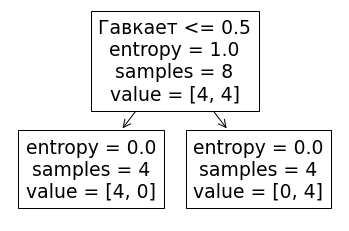

In [27]:
dogs = dogs.drop('Unnamed: 0', axis=1)

dogs_X = dogs.iloc[:, :3]
dogs_y = dogs.iloc[:, 3]

dogs_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
dogs_clf.fit(dogs_X, dogs_y)

tree.plot_tree(dogs_clf, feature_names=dogs_X.columns)

In [36]:
cats = pd.read_csv('cats.csv', index_col = False)
cats = cats.drop('Unnamed: 0', axis = 1)

In [37]:
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [45]:
-1/5 * np.log2(1/5) - 4/5 * np.log2(4/5)

0.7219280948873623

In [46]:
-5/9 * np.log2(5/9) - 4/9 * np.log2(4/9)

0.9910760598382222

In [71]:
gav = (5/10 * 0 + 5/10 * 0.72 ) # гавкает

In [72]:
sher = round((9/10 * 0.99),2) # шерстит

In [80]:
E = -4/10 * np.log2(4/10) - 6/10 * np.log2(6/10)
E

0.9709505944546686

In [74]:
round(E - gav, 2)

0.61

In [75]:
round(E - sher,2)

0.08

In [76]:
round(E - 0, 2)

0.97

In [78]:
gav_test = round(5/10 * 0 + 5/10 * 0.72, 2)
gav_test

0.36

In [79]:
sher_test = round(9/10 * 0.99, 2)
sher_test

0.89